In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#x_train = x_train.reshape(-1, 32, 32, 3)
#x_test = x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [28]:
# cnn 모델 구축

cnn = Sequential()
# 3 * 3 크기의 필터 32개로 구성된다.
cnn.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(3,3), filters = 32, activation = 'relu'))
# 3 * 3 크기의 필터 64개로 구성된다.
cnn.add(Conv2D(kernel_size=(3,3), filters = 64, activation = 'relu'))
# 맥스 풀링 수행
cnn.add(MaxPool2D(pool_size=(2,2)))
# 25% 비율로 랜덤하게 연결을 끊어 오버피팅 방지
cnn.add(Dropout(0.25))
# 여기까지가 특징 추출기

# 3차원 텐서를 1차원 벡터로 변환
cnn.add(Flatten())
# 128개의 노드를 가지는 덴스층과
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
# 10개의 노드를 가지는 출력층으로 모델 구축
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [29]:
#CNN 모델 컴파일 및 학습
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 101s 255ms/step - loss: 1.6938 - accuracy: 0.3843 - val_loss: 1.3240 - val_accuracy: 0.5273
Epoch 2/30
391/391 [==============================] - 89s 228ms/step - loss: 1.3692 - accuracy: 0.5097 - val_loss: 1.1430 - val_accuracy: 0.6033
Epoch 3/30
391/391 [==============================] - 98s 252ms/step - loss: 1.2262 - accuracy: 0.5639 - val_loss: 1.0952 - val_accuracy: 0.6203
Epoch 4/30
391/391 [==============================] - 91s 234ms/step - loss: 1.1379 - accuracy: 0.5948 - val_loss: 1.0271 - val_accuracy: 0.6500
Epoch 5/30
391/391 [==============================] - 98s 250ms/step - loss: 1.0699 - accuracy: 0.6203 - val_loss: 0.9728 - val_accuracy: 0.6638
Epoch 6/30
391/391 [==============================] - 93s 237ms/step - loss: 1.0214 - accuracy: 0.6372 - val_loss: 0.9488 - val_accuracy: 0.6702
Epoch 7/30
391/391 [==============================] - 94s 240ms/step - loss: 0.9770 - accuracy: 0.6503 - val_loss: 0.9256 - val_a

In [30]:
#모델 정확도 평가
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9423 - accuracy: 0.7087


[0.9423067569732666, 0.7087000012397766]

In [31]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

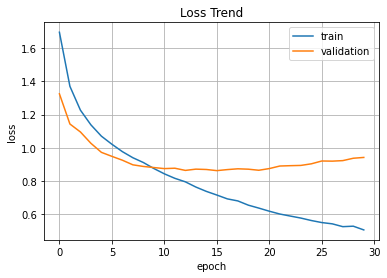

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.grid()
plt.show()